<a href="https://colab.research.google.com/github/CameronChadwick/maine_climate/blob/main/maine_climate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

# Load Data

In [2]:
prcp_url = "https://raw.githubusercontent.com/CameronChadwick/maine_climate/main/Cameron%20Chadwick%20-%20All_Months_PCP_1895_2022_1.csv"
temp_url = "https://raw.githubusercontent.com/CameronChadwick/maine_climate/main/Cameron%20Chadwick%20-%20All_Months_Temp_1895_2022.csv"

prcp_df = pd.read_csv(prcp_url)
temp_df = pd.read_csv(temp_url)
prcp_df.tail(80)

,Date,January Inches,February Inches,March Inches,April Inches,May Inches,June Inches,July Inches,August Inches,September Inches,October Inches,November Inches,December Inches
48,1943,1.35,2.61,3.10,3.09,3.79,5.00,3.72,4.66,2.45,6.53,6.06,1.17
49,1944,1.15,2.85,3.39,2.37,1.26,4.40,3.33,1.98,5.85,4.53,4.14,3.28
50,1945,4.39,2.78,2.19,4.79,6.09,3.63,4.45,1.93,4.61,4.14,4.14,3.27
51,1946,3.29,2.91,1.48,3.30,3.40,1.96,3.01,4.49,2.99,2.98,3.38,3.98
52,1947,2.93,3.73,3.08,2.53,5.37,4.56,5.14,1.71,2.76,0.51,4.13,1.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,2018,4.78,3.02,2.95,4.65,1.92,3.69,4.06,3.78,3.15,4.48,6.18,3.79
124,2019,5.25,2.87,2.19,5.37,4.49,4.69,3.31,4.80,3.46,5.73,4.08,3.75
125,2020,3.06,2.85,2.70,4.17,2.62,2.29,3.85,2.81,1.00,6.12,3.83,5.33
126,2021,1.89,2.90,1.98,3.24,2.74,2.22,5.46,2.66,6.46,3.78,3.28,3.15


## Clean the Data

In [3]:
dec_temp_22 = [temp_df['December Temp(F)'][126], temp_df['December Temp(F)'][125], temp_df['December Temp(F)'][124]]
prcp_dec_22 = [prcp_df['December Inches'][126], prcp_df['December Inches'][125], prcp_df['December Inches'][124]]
prcp_jan_22 = [prcp_df['January Inches'][126], prcp_df['January Inches'][125], prcp_df['January Inches'][124]]

def mean(data):
  added = 0
  for value in data:
    added += value
  divide = len(data)
  mean = added / divide
  return mean

dec_22_temp = round(mean(dec_temp_22), 1)
prcp_dec_22 = round(mean(prcp_dec_22), 1)
prcp_jan_22 = round(mean(prcp_jan_22), 1)

temp_df.replace(temp_df['December Temp(F)'][127], dec_22_temp, inplace=True)
prcp_df.replace(prcp_df['December Inches'][127], prcp_dec_22, inplace=True)
prcp_df.replace(prcp_df['January Inches'][127], prcp_jan_22, inplace=True)

print(temp_df['December Temp(F)'][127], prcp_df['January Inches'][127], prcp_df['December Inches'][127])

24.8 3.4 4.1


## Plotting Test

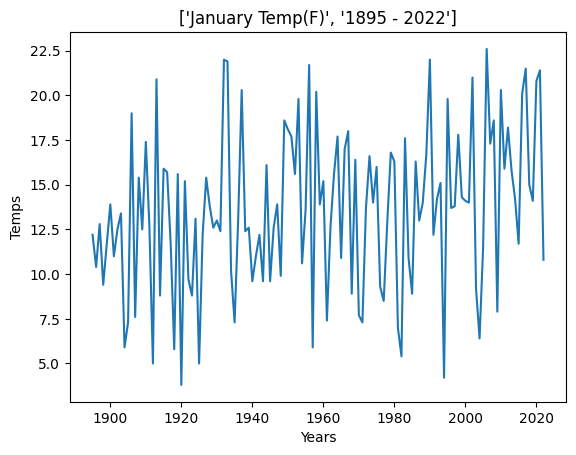

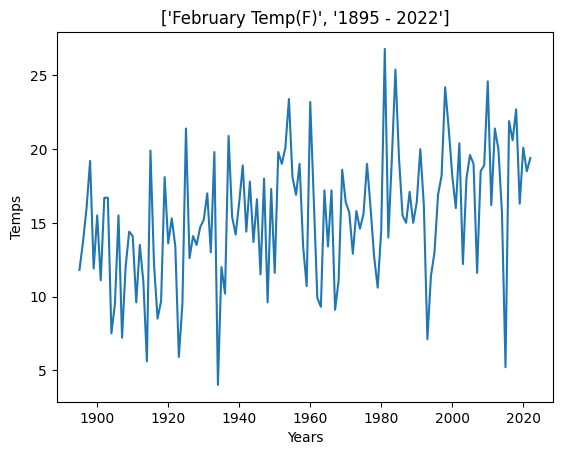

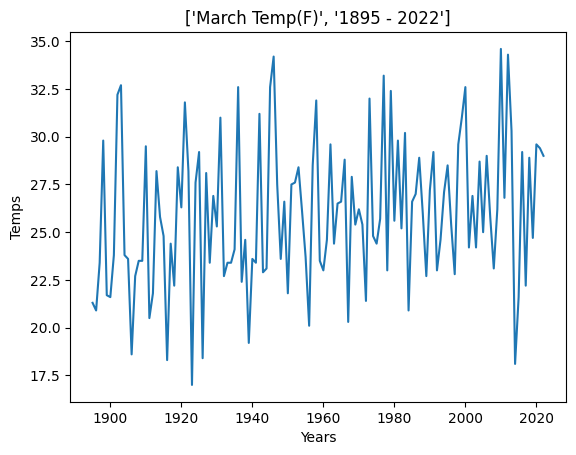

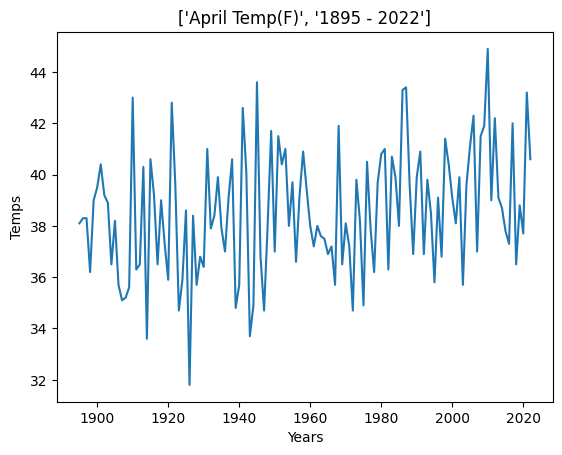

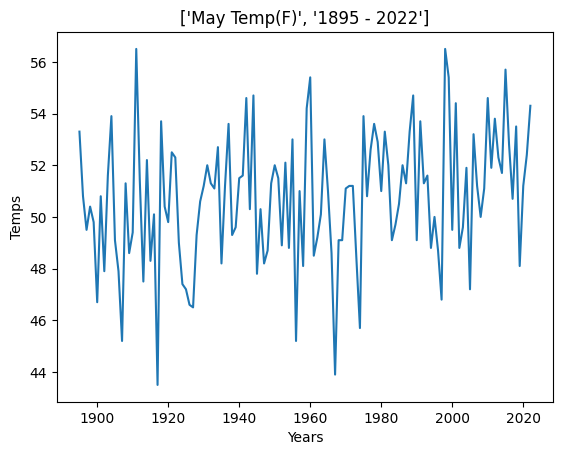

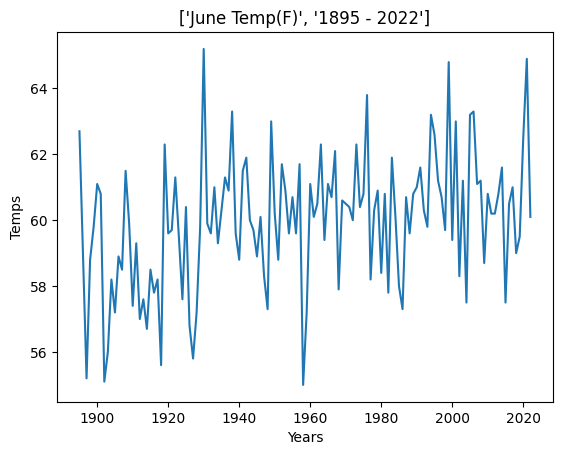

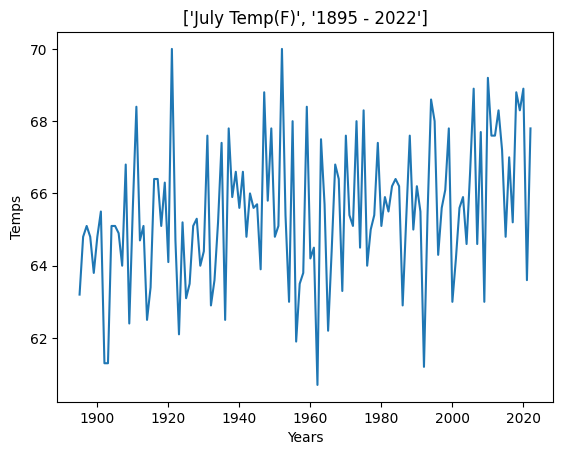

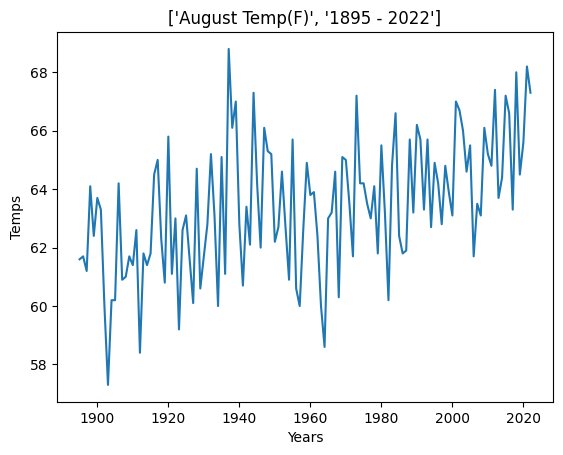

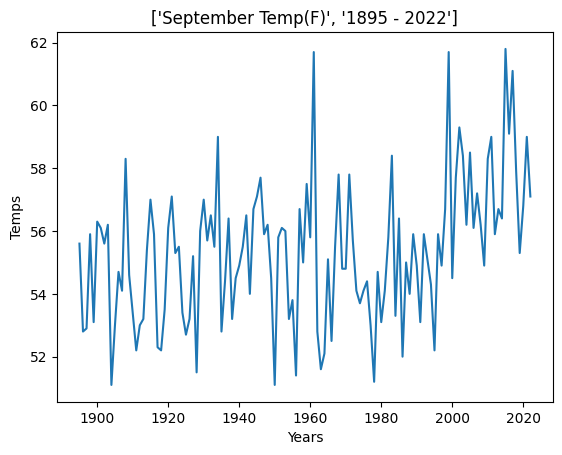

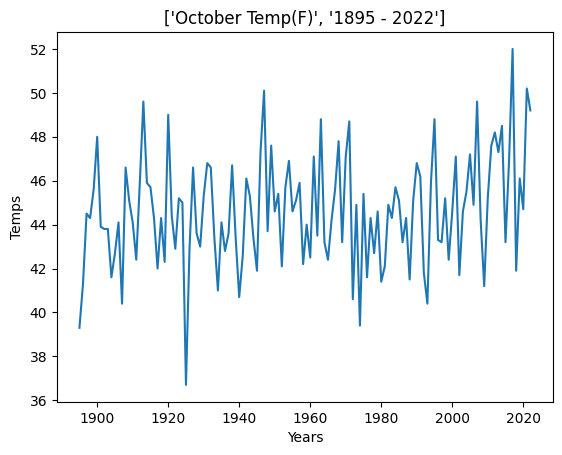

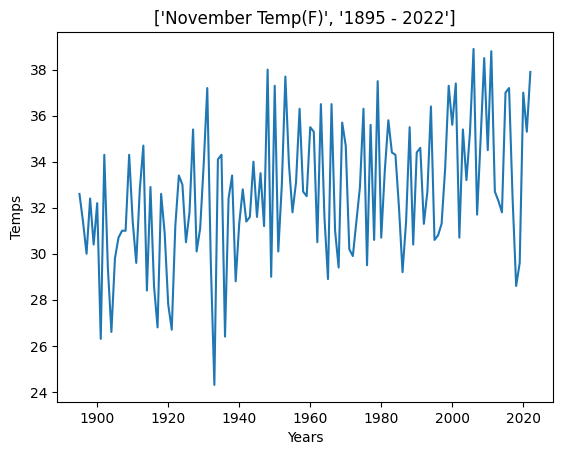

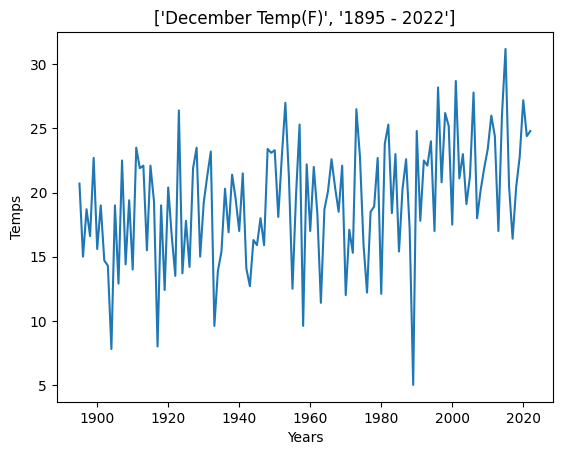

In [4]:
def monthly_data(frame, month, title, xlabel, ylabel):
  temps = frame[month].tolist()
  years = frame['Date'].tolist()
  plt.figure()
  plt.plot(years, temps)
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)

temp_months = temp_df.columns.tolist()
temp_months.pop(0)
prcp_months = prcp_df.columns.tolist()
prcp_months.pop(0)

for index in range(len(temp_months)):
  monthly_data(temp_df, temp_months[index], [temp_months[index],'1895 - 2022'], 'Years', 'Temps')

# Getting Statistics

In [5]:
def yearly_stats(frame):
  frame['Yearly Deviation'] = round(frame.iloc[:,1:13].std(axis = 1), 1)
  frame['Yearly Average'] = round(frame.iloc[:,1:13].mean(axis = 1), 1)
  frame['Yearly Median'] = round(frame.iloc[:,1:13].median(axis = 1), 1)
  frame['Yearly Min'] = frame.iloc[:,1:13].min(axis = 1)
  frame['Yearly Max'] = frame.iloc[:,1:13].max(axis = 1)
  return frame.tail(15)

def monthly_stats(frame):
  means = round(frame.iloc[:,1:13].mean(axis=0), 1)
  medians = round(frame.iloc[:,1:13].median(axis=0), 1)
  dev = round(frame.iloc[:,1:13].std(axis=0), 1)
  min = frame.iloc[:,1:13].min(axis=0)
  max = frame.iloc[:,1:13].max(axis=0)
  return means, medians, dev, min, max

def min_max_year(frame, mons, min_max):
  min_dates = []

  for index in range(len(mons)):
    min = frame.loc[frame[mons[index]] == monthly_stats(frame)[min_max][index]]
    min_dates.append(min.iloc[0,0])
  return min_dates

yearly_stats(temp_df)
yearly_stats(prcp_df)

min_max_year(temp_df, temp_months, 4)

[2006, 1981, 2010, 2010, 1911, 1930, 1921, 1937, 2015, 2017, 2006, 2015]

# Plotting Statistics

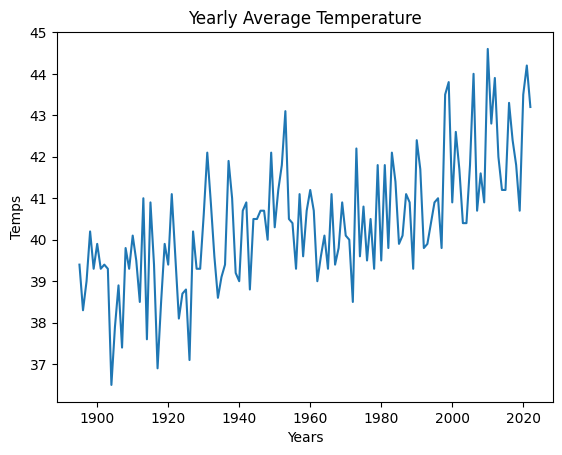

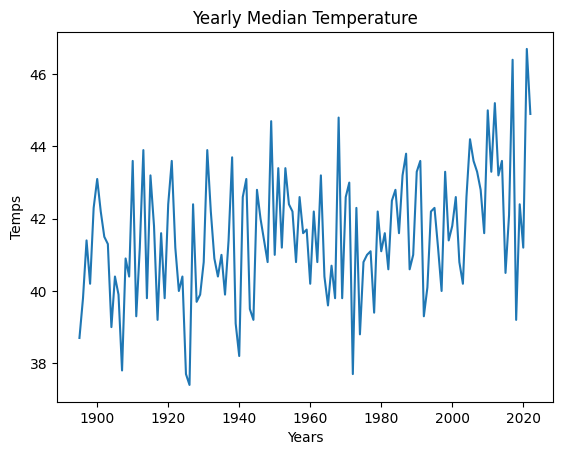

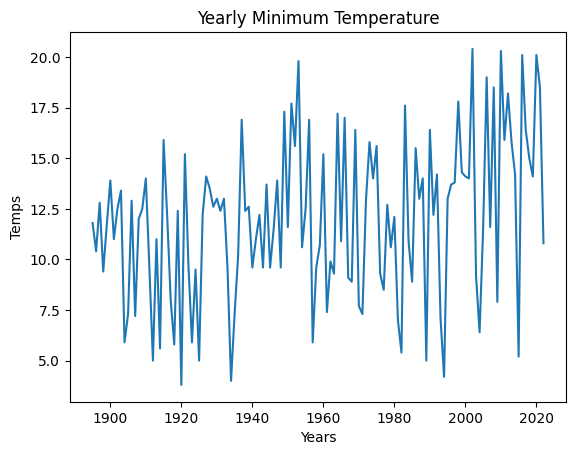

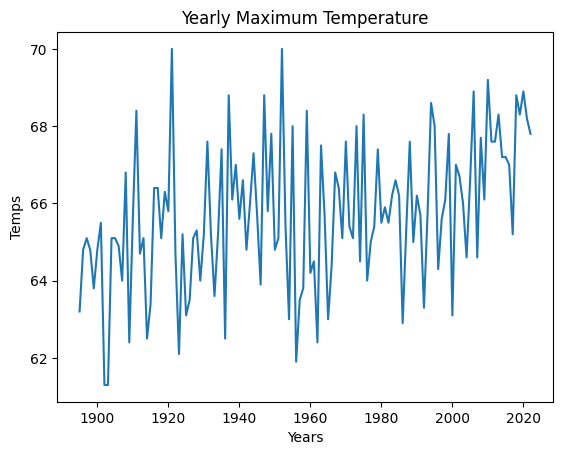

In [6]:
def plotting_yearly(frame, col, title, xlabel, ylabel):
  plt.figure()
  plt.plot(frame['Date'], frame[col])
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)

plotting_yearly(temp_df, 'Yearly Average', 'Yearly Average Temperature', 'Years', 'Temps')
plotting_yearly(temp_df, 'Yearly Median', 'Yearly Median Temperature', 'Years', 'Temps')
plotting_yearly(temp_df, 'Yearly Min', 'Yearly Minimum Temperature', 'Years', 'Temps')
plotting_yearly(temp_df, 'Yearly Max', 'Yearly Maximum Temperature', 'Years', 'Temps')

# plt.figure()
# plt.plot(temp_df['Date'], temp_df['Yearly Min'])
# plt.plot(temp_df['Date'], temp_df['Yearly Max'])
# plt.title('Min and Max Temps')
# plt.xlabel('Years')
# plt.ylabel('Temps')

## Moving Average Function

In [7]:
def weighted(x_list, w, fil_len):
  output = []
  ns = fil_len - 1
  for index in range(len(x_list) - ns):
    wxl = 0
    for n in range(fil_len):
      wx = (w[n] * x_list[n + index])
      wxl += wx

    wsum = sum(w)
    weight_avg_val = wxl/wsum
    output.append(weight_avg_val)
  return output



## Plotting With Averages

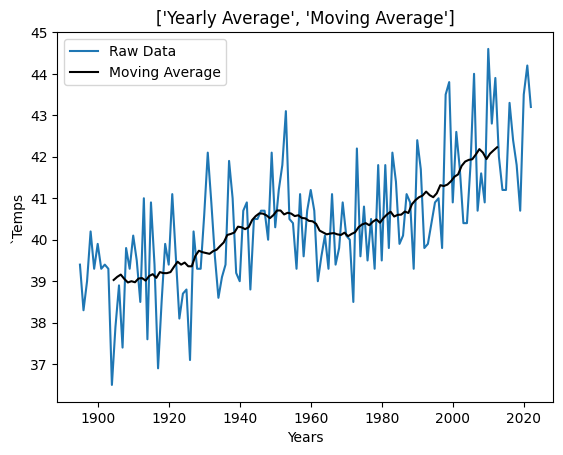

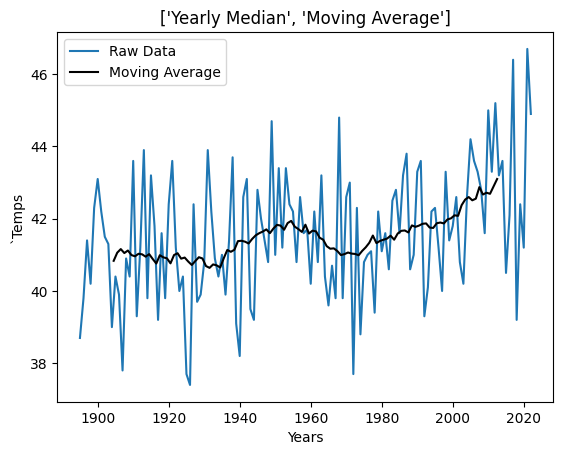

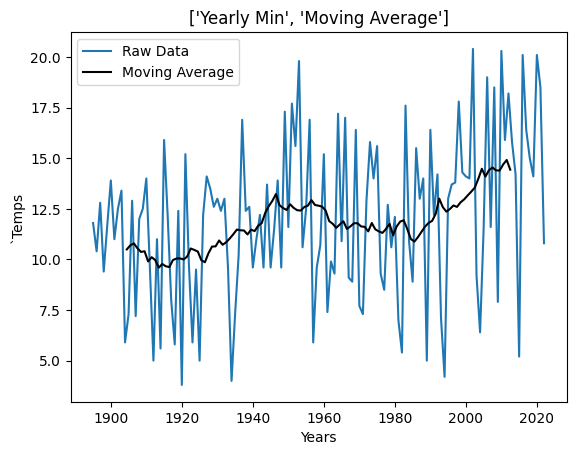

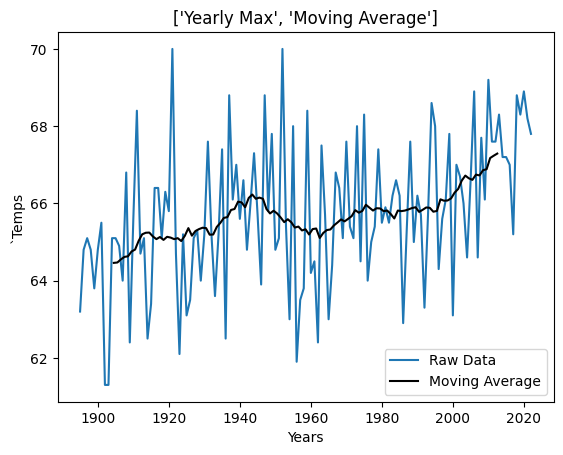

In [12]:
def plotting_avg(frame, col, leng, title, xlabel, ylabel):
  wts = [1 for i in range(leng)]
  move_col = weighted(frame[col], wts, leng)
  move_year = weighted(frame['Date'], wts, leng)
  
  plt.figure()
  plt.plot(frame['Date'], frame[col], label='Raw Data')
  plt.plot(move_year, move_col, color='black', label='Moving Average')
  plt.title([col, title])
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.legend()

plotting_prcp = prcp_df.columns.tolist()
plotting_temp = temp_df.columns.tolist()
for n in range(14):
  plotting_prcp.pop(0)
  plotting_temp.pop(0)

for index in range(len(plotting_temp)):
  plotting_avg(temp_df, plotting_temp[index], 20, 'Moving Average', 'Years', '`Temps')

## Future Values

In [18]:
def slope_yint(x, y):
  x_sum = 0
  x_squ = 0
  y_sum = 0 
  xy_sum = 0
  points = len(x)

  for n in range(len(x)):
    xy_sum += x[n] * y[n]
    x_sum += x[n]
    x_squ += x[n] * x[n]
    y_sum += y[n]

  matrix1 = [[x_squ, x_sum], [x_sum, points]]
  matrix2 = [xy_sum, y_sum]
  invmat1 = np.linalg.inv(matrix1)
  result = np.dot(matrix2, invmat1)
  return result

def years(start_val, end_val, frame, weight):
  wts = [1 for i in range(weight)]
  years_avg = frame.iloc[start_val:end_val, 0:1]
  years_avg = years_avg['Date'].tolist()
  move_year = weighted(years_avg, wts, weight)
  return move_year

def average_vars(start_val, end_val, frame, weight):
  wts = [1 for i in range(weight)]
  years_avg = frame.iloc[start_val:end_val, 14:15]
  years_avg = years_avg['Yearly Average'].tolist()
  move_col = weighted(years_avg, wts, weight)
  return move_col

# period 3 index 76, 128

def future_calc(x, y, year):
  slope_int = slope_yint(x, y)
  future_val = round(slope_int[0] * year + slope_int[1], 2)
  return future_val

future_years = [2025, 2030, 2035]

for x in future_years:
  print(str(x), future_calc(years(76, 128, temp_df, 20), average_vars(76, 128, temp_df, 20), x))

slope_yint(years(76, 128, temp_df, 20), average_vars(76, 128, temp_df, 20))

2025 42.99
2030 43.28
2035 43.57


array([ 5.82302807e-02, -7.49264525e+01])

## Correlation

In [19]:
def correlation(x, y):
  x_sum = 0
  x_squ = 0
  y_sum = 0
  y_squ = 0
  xy_sum = 0

  for n in range(len(x)):
    xy_sum += x[n] * y[n]
    x_sum += x[n]
    x_squ += x[n] * x[n]
    y_sum += y[n]
    y_squ += y[n] * y[n]

  x_y = x_sum * y_sum
  numerator = len(x) * xy_sum - x_y

  subtract_x = (len(x) * x_squ - x_sum**2)**0.5
  subtract_y = (len(y) * y_squ - y_sum**2)**0.5
  denomonator = subtract_x * subtract_y
  corr_coeff = round(numerator / denomonator, 3)
  return corr_coeff

print(correlation(years(76, 128, temp_df, 20), average_vars(76, 128, temp_df, 20)))
print(correlation(years(38, 94, temp_df, 20), average_vars(38, 94, temp_df, 20)))
print(correlation(years(1, 58, temp_df, 20), average_vars(1, 58, temp_df, 20)))
print(correlation(years(76, 128, prcp_df, 20), average_vars(76, 128, prcp_df, 20)))

0.982
-0.622
0.955
0.82
